In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd


In [3]:
# read csv to df
df = pd.read_csv('data/SF-2003-2018.csv')
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [4]:
# show colum names
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [5]:
df = df[['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location']]

In [6]:
# percent of line with Resulution == NONE

print(f"{df[df['Resolution'] == 'NONE'].shape[0] / df.shape[0]} % des appels a la police n'aboutissent a rien" )

0.6399351968161914 % des appels a la police n'aboutissent a rien


<AxesSubplot:>

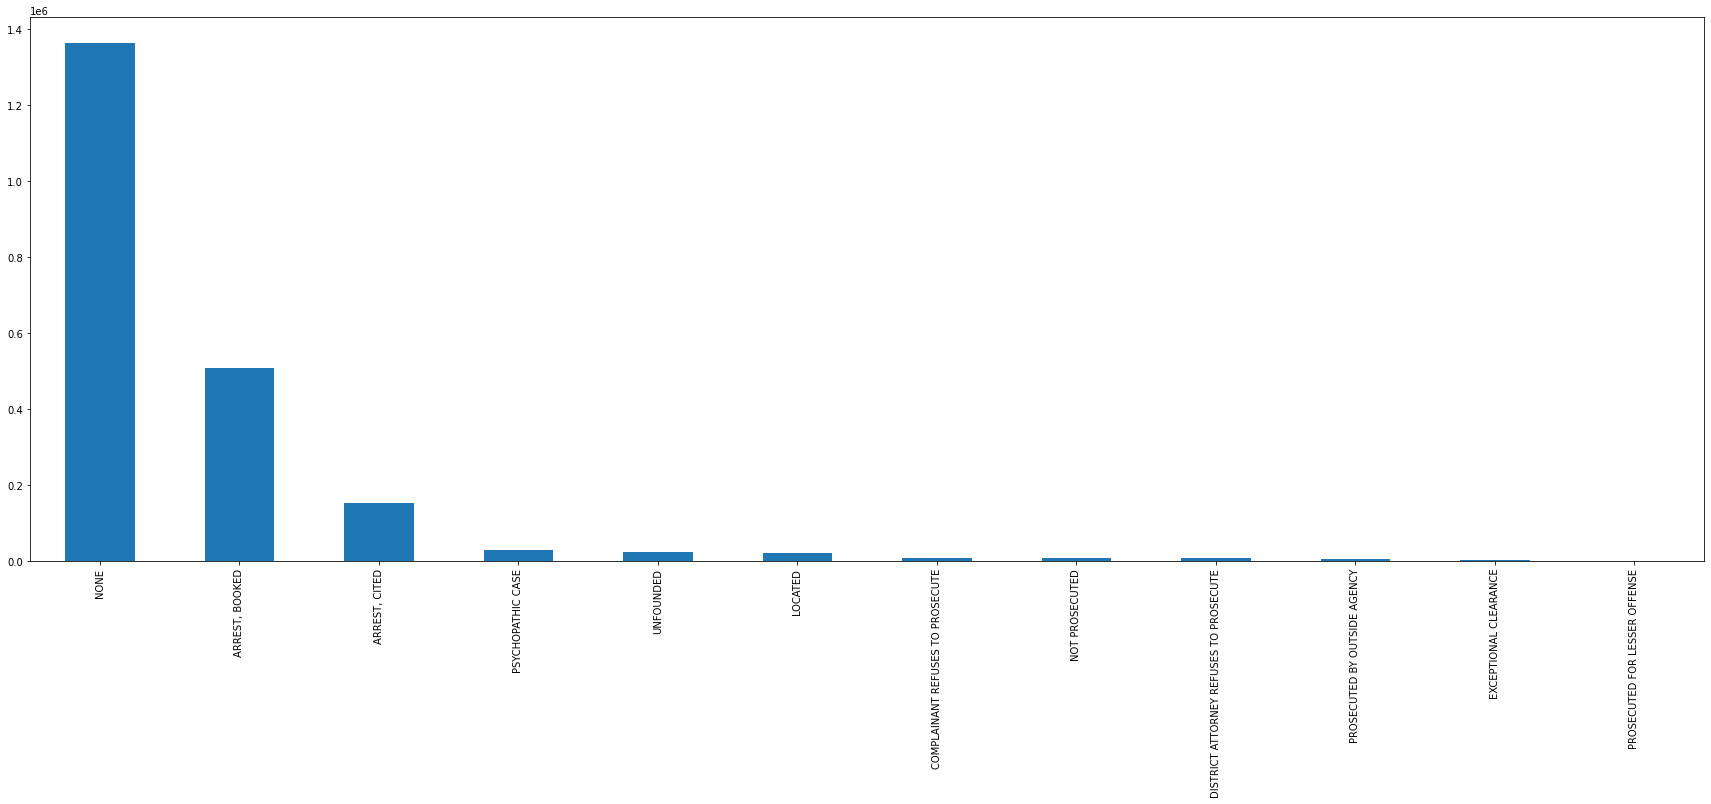

In [28]:
# pie resolution , bigger size

df['Resolution'].value_counts().plot.bar(figsize=(30, 10))



<AxesSubplot:>

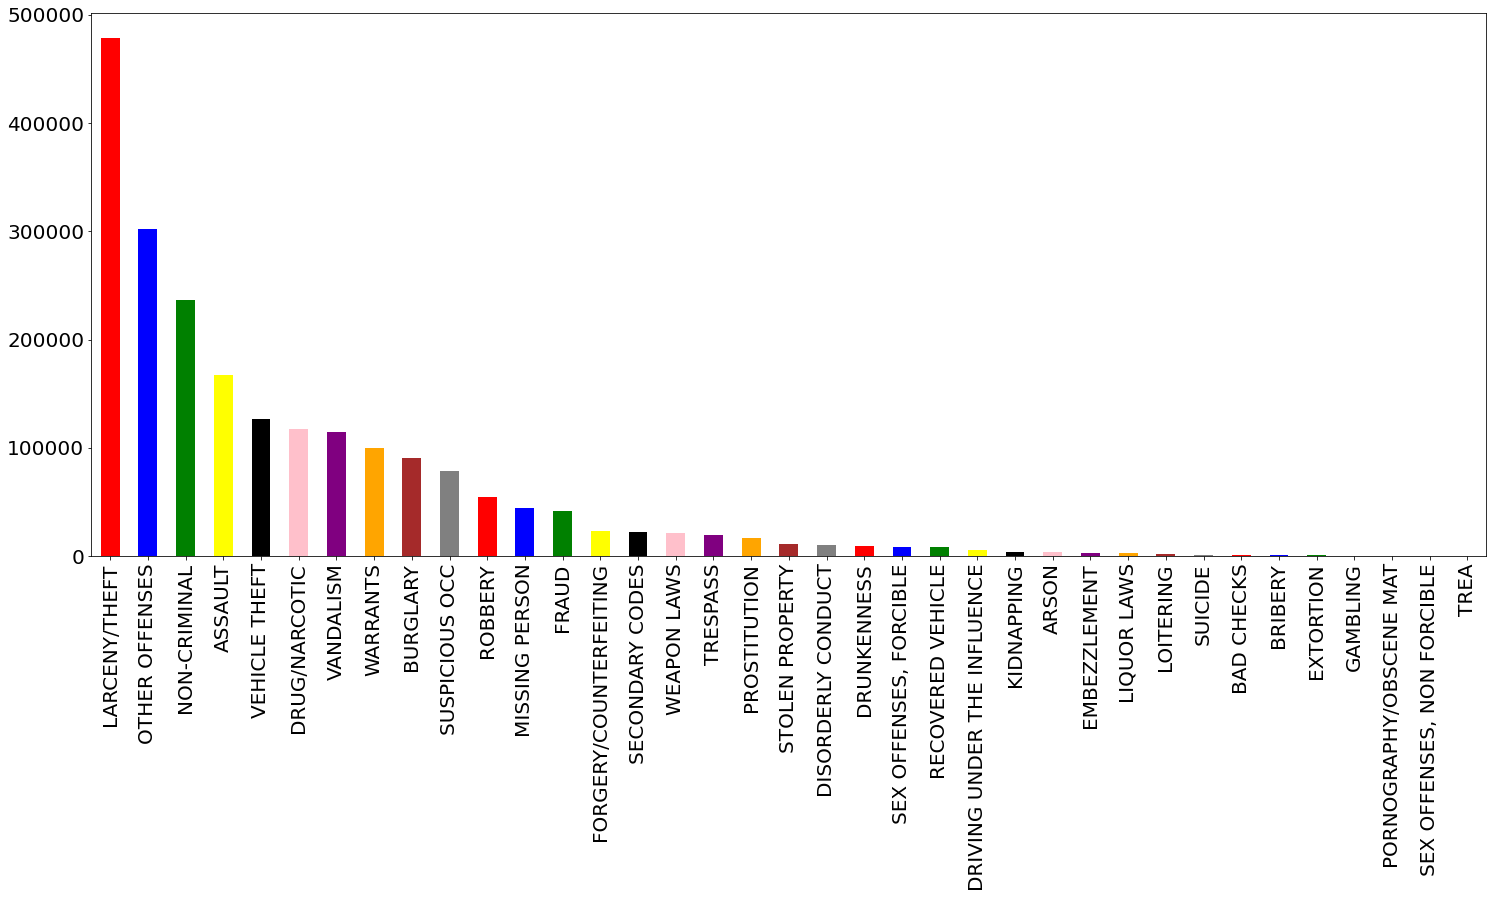

In [26]:
color = ['red', 'blue', 'green', 'yellow', 'black', 'pink', 'purple', 'orange', 'brown', 'grey']
df['Category'].value_counts().plot.bar(figsize=(25, 10), color=color, fontsize=20)

<AxesSubplot:ylabel='Category'>

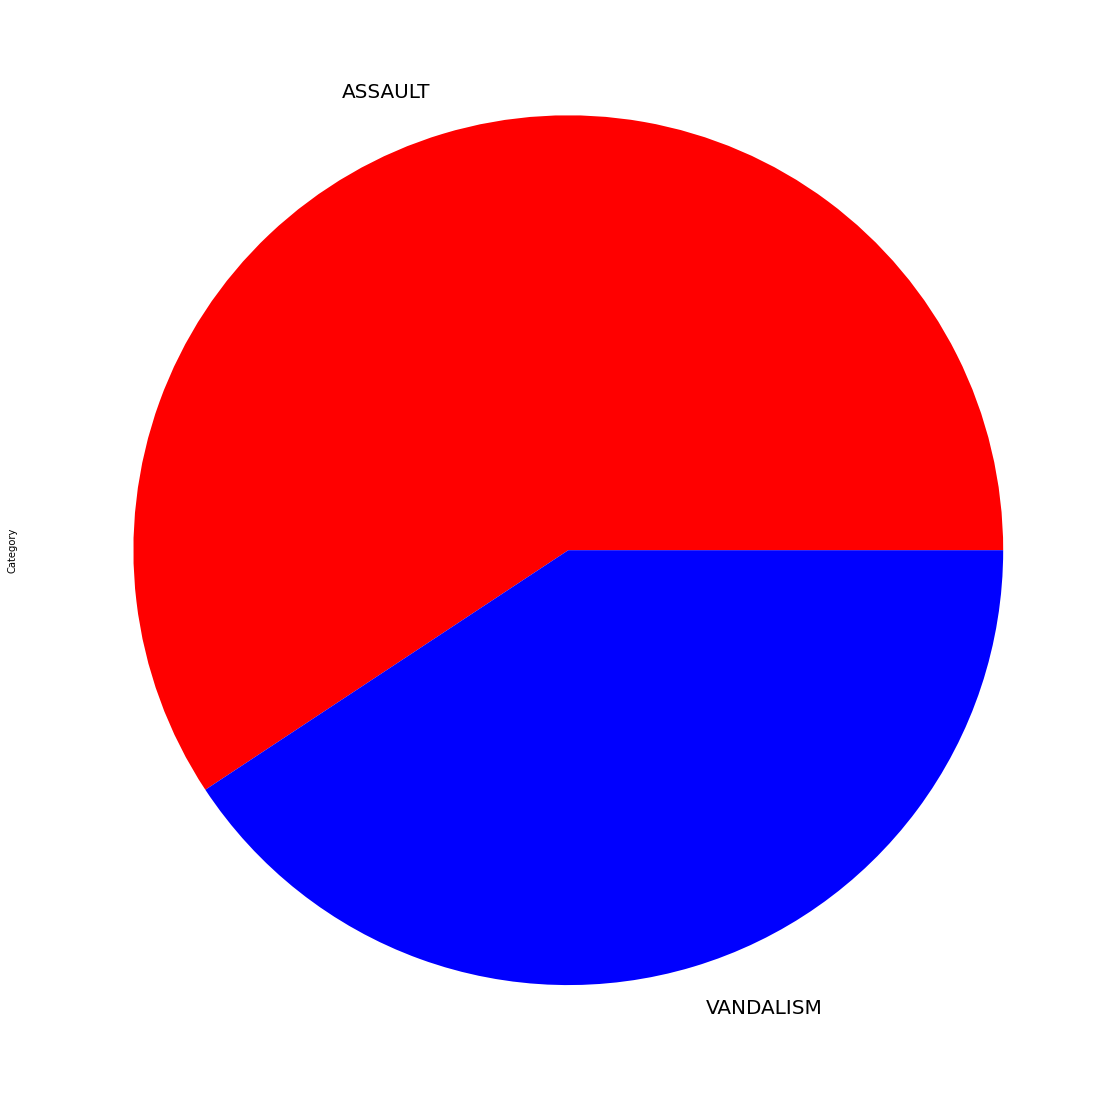

In [9]:
# plot pie category vendalism and assault

df[df['Category'].isin(['VANDALISM', 'ASSAULT'])]['Category'].value_counts().plot.pie(figsize=(20, 20), textprops={'fontsize': 20}, colors=color)


<AxesSubplot:>

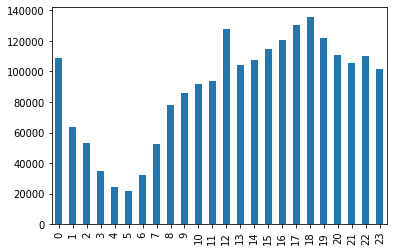

In [10]:
# histogramme des crimes par jour et heure

df['Time'] = pd.to_datetime(df['Time'])

df["Time"].dt.hour.value_counts().sort_index().plot.bar()


<AxesSubplot:>

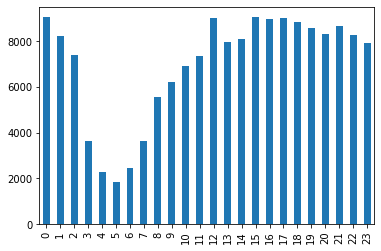

In [11]:
# time plot bar of category assault

df[df['Category'] == 'ASSAULT']['Time'].dt.hour.value_counts().sort_index().plot.bar()

<AxesSubplot:>

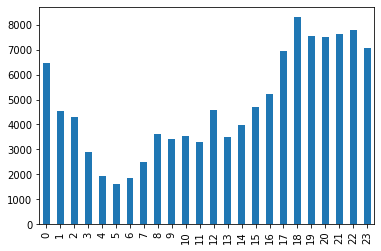

In [12]:
# time plot bar of category vendalism

df[df['Category'] == 'VANDALISM']['Time'].dt.hour.value_counts().sort_index().plot.bar()

In [13]:
# display the 10 most dangerous streets

df['Address'].value_counts().head(10)

800 Block of BRYANT ST      63115
800 Block of MARKET ST      16664
2000 Block of MISSION ST    10686
1000 Block of POTRERO AV     9720
900 Block of MARKET ST       7596
0 Block of TURK ST           6727
0 Block of 6TH ST            6507
16TH ST / MISSION ST         6131
300 Block of ELLIS ST        6088
1000 Block of MARKET ST      5582
Name: Address, dtype: int64

In [19]:
# display on map the position of vendaism and assault for year 2018 first 100

import folium

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)


for index, row in df[df['Category'].isin(['VANDALISM']) & (df['Date'].str.contains('2018'))].head(100).iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['Address'], icon=folium.Icon(color='blue')).add_to(m)

for index, row in df[df['Category'].isin(['ASSAULT']) & (df['Date'].str.contains('2018'))].head(100).iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['Address'], icon=folium.Icon(color='red')).add_to(m)

m



In [33]:
# display on map the position of vendaism and assault for year 2018 first 100 (heatmap)

import folium
from folium.plugins import HeatMap

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

HeatMap(df[df['Category'].isin(['VANDALISM']) & (df['Date'].str.contains('2018'))].head(100)[['Y', 'X']].values).add_to(m)

m    